# Bulanıklaştırma

Görüntü bulanıklığı, görüntünün düşük geçişli bir filtre uygulanmasıyla elde edilir. (Low-Pass Filtering)

Gürültüyü gidermek için kullanışlıdır. Aslında görüntüden yüksek frekanslı içerdiği (örneğin: parazit, kenarlar) kaldırılır.

OpenCV, üç ana tür bulanıklaştırma tekniği sağlar.

* Ortalama Bulanıklaştırma
* Gauss Bulanıklaştırma
* Medyan Bulanıklaştırma

##### Mean Bulanıklaştırma (Ortalama)

* Bir görüntünün normalleştirilmiş bie kutu filtresiyle (box-filter) sarılmasıyla yapılır.
* Çekirdek alanı altındaki tüm piksellerim ortalamasını alır ve bu dprtalamayı merkezi öge ile yer değiştirilr.

##### Gauss Bulanıklaştırma

* Bu yöntemde box filter yerine Gauss Çekirdeği kullanılır.
* Pozitif ve tek olması gereken çekirdeğin genişliğini ve yüksekliğini belirtir.
* SigmaX ve sigmaY, X ve Y yönlerindeki standart sapmayı belirtmelyiz.

##### Medyan Bulanıklaştırma 

* Çekirdek alanı altındaki tüm piksellerin medyanını alır ve merkezi öğe bu medyan değeri ile değiştirilir.
* Tuz ve biber gürültüsüne karşı oldukça etkildir.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

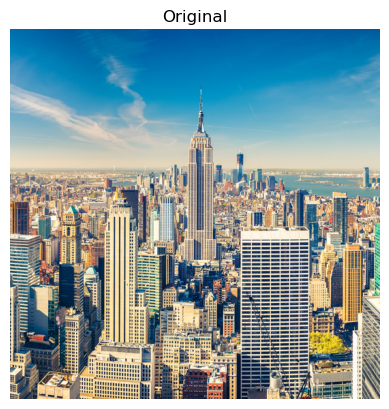

In [2]:
#Blurring detayı azaltır ve gürültüyü engeller
img= cv2.imread("NYC.jpg")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title("Original")
plt.show()

##### Ortalama Bulanıklaştırma

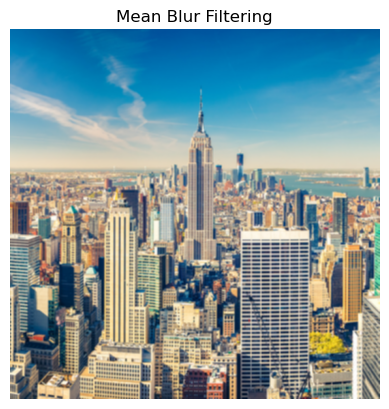

In [3]:
dst2 = cv2.blur(img, ksize=(3,3))
plt.figure()
plt.imshow(dst2)
plt.axis("off")
plt.title("Mean Blur Filtering")
plt.show()

##### Gauss Blur


* sigmaX parametresi, Gaussian bulanıklığı işlemindeki X yönünde (yatay) standart sapmayı temsil eder. Gaussian bulanıklığı, görüntü üzerindeki gürültüyü azaltmak veya detayları yumuşatmak için kullanılan bir filtreleme yöntemidir. Standart sapma değeri, bulanıklık etkisinin gücünü kontrol eder.

* Gaussian bulanıklığı işlemi, bir pikselin değerini, çevresindeki piksellerin değerleriyle bir ağırlıklandırma işlemiyle hesaplar. Bu ağırlıklandırma işlemi, Gauss fonksiyonunun standart sapmasına bağlıdır. Yüksek bir standart sapma değeri, daha fazla yayılım ve daha güçlü bir bulanıklık etkisi anlamına gelir.

* sigmaX parametresi, bulanıklığın yatay yönde ne kadar yayılacağını kontrol eder. Daha büyük bir sigmaX değeri, bulanıklığın daha geniş bir alana yayılmasını sağlar, bu da daha güçlü bir bulanıklık etkisine neden olur. Öte yandan, daha küçük bir sigmaX değeri, daha az yayılma ve daha hafif bir bulanıklık etkisi sağlar.

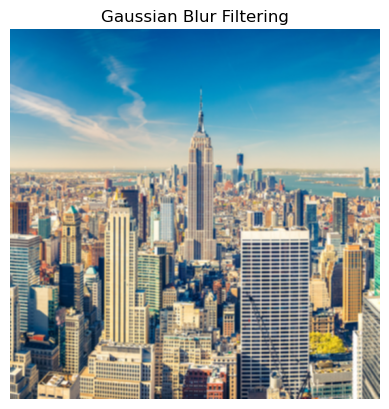

In [4]:
gb= cv2.GaussianBlur(img, ksize=(3,3), sigmaX=7)
plt.figure()
plt.imshow(gb)
plt.axis("off")
plt.title("Gaussian Blur Filtering")
plt.show()

##### Median Blur  

Text(0.5, 1.0, 'Median Blur Filtering')

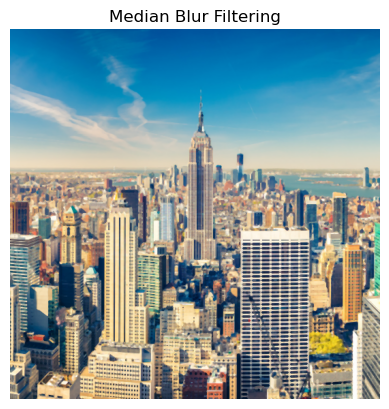

In [5]:
mb= cv2.medianBlur(img, ksize=3)
plt.figure()
plt.axis("off")
plt.imshow(mb)
plt.title("Median Blur Filtering")

Resimlerin üzerinde bir noise olmalı ki bu kernellerin yani kullandığımız filtrelerin işe yarayıp yaramadığını bilelim.

#### Gauss Gürültüsü Oluşturmak

def gaussianNoise(image):: gaussianNoise adında bir fonksiyon tanımlanıyor ve image adında bir giriş parametresi alıyor. Bu fonksiyon, verilen görüntüye Gaussian gürültüsü uygulayarak gürültülü bir görüntü döndürecektir.

row, col, ch = image.shape: Giriş görüntünün şeklinden (shape) row (satır sayısı), col (sütun sayısı) ve ch (kanal sayısı) değerleri alınıyor. Bu değerler, giriş görüntünün boyutunu temsil eder.

mean = 0: Gaussian dağılımının ortalaması (mean) sıfır olarak ayarlanır. Bu, gürültünün görüntüye eklenmeden önceki ortalamasını belirtir.

var = 0.05: Gaussian dağılımının varyansı (var) 0.05 olarak ayarlanır. Bu, gürültünün şiddetini kontrol eder. Daha yüksek bir varyans, daha güçlü bir gürültüye neden olur.

sigma = var**0.5: Standart sapma (sigma), varyansın karekökü olarak hesaplanır. Gaussian dağılımının standart sapması, gürültünün dağılımını belirler.

gauss = np.random.normal(mean, sigma, (row, col, ch)): NumPy kütüphanesinin np.random.normal() işlevi kullanılarak, belirtilen ortalamaya (mean) ve standart sapmaya (sigma) sahip Gaussian dağılımına göre rastgele sayılar üretilir. Bu, gürültüyü temsil eden bir matris oluşturur. Matrisin boyutu, giriş görüntünün boyutuyla aynıdır.

gauss = gauss.reshape(row, col, ch): Üretilen matris yeniden şekillendirilir (reshape işlemi), böylece boyutları giriş görüntü ile aynı olur. Bu adım, gerektiğinde gürültü matrisini görüntüyle doğrudan toplayabilmek için yapılır.

noisy = image + gauss: Gürültü matrisi, giriş görüntüsüyle eleman bazında toplanır. Bu, gürültünün görüntüye eklenmesini sağlar.

return noisy: Elde edilen gürültülü görüntü (noisy), fonksiyonun çağrıldığı yere döndürülür.

In [6]:
def gaussianNoise(image):
    row, col, ch= image.shape
    mean= 0
    var= 0.05
    sigma= var**0.5
    gauss= np.random.normal(mean, sigma,(row,col, ch))
    gauss= gauss.reshape(row, col, ch)
    noisy= image+ gauss
    
    return noisy

##### Normalizasyon Ve Resmi İçe Aktarma

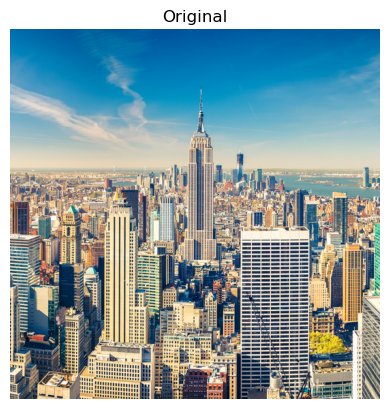

In [46]:
img= cv2.imread("NYC.jpg")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title("Original")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


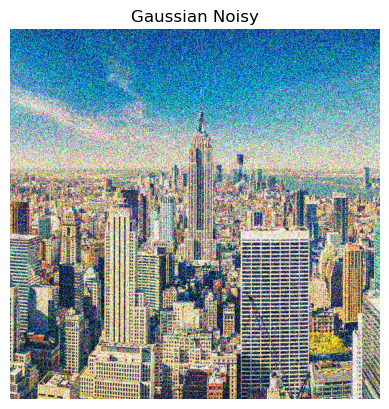

In [8]:
gaussianNoisyImage = gaussianNoise(img)
plt.figure()
plt.imshow(gaussianNoisyImage)
plt.axis("off")
plt.title("Gaussian Noisy")
plt.show()

# Düzeltme işlemi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


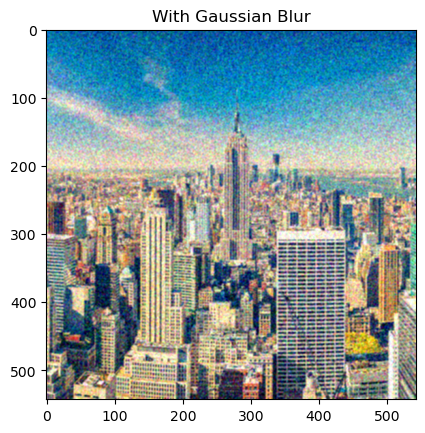

In [10]:
gb2= cv2.GaussianBlur(gaussianNoisyImage, ksize=(3,3), sigmaX=7)
plt.figure()
plt.imshow(gb2)
plt.title("With Gaussian Blur")
plt.show()